## Code to read the predictions

In [2]:
from src.utils.analysis import LanguageModelAnalyzer, BaselineAnalyzer

In [50]:
GPT2_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/pred_gpt2_abs"
BERT_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/pred_bert_abs"
GLOVE_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/glove_histgrad"
DUMMY_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/dummy"
AVG_PATH = (
    "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/avg"
)
WORDAVG_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/absolute/wordavg"

In [51]:
gpt2_analyzer = LanguageModelAnalyzer(GPT2_PATH, batch_analysis=False)
bert_analyzer = LanguageModelAnalyzer(BERT_PATH, batch_analysis=False)
glove_analyzer = BaselineAnalyzer(GLOVE_PATH)
dummy_analyzer = BaselineAnalyzer(DUMMY_PATH)
avg_analyzer = BaselineAnalyzer(AVG_PATH)
wordavg_analyzer = BaselineAnalyzer(WORDAVG_PATH)

all lengths 4822 4822 4822 4822 4822 4822
all lengths 4822 4822 4822 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822


In [98]:
gpt2_error = gpt2_analyzer.compute_mse_over_dataset()
bert_error = bert_analyzer.compute_mse_over_dataset()
glove_error = glove_analyzer.compute_mse_over_dataset()
print(
    f"ERROR GPT2: {gpt2_error}, \nERROR BERT: {bert_error}, \nERROR GLOVE: {glove_error}, \nERROR DUMMY: {dummy_analyzer.compute_mse_over_dataset()}, \nERROR AVG: {avg_analyzer.compute_mse_over_dataset()}, \nERROR WORDAVG: {wordavg_analyzer.compute_mse_over_dataset()}"
)

ERROR GPT2: 0.39629125595092773, 
ERROR BERT: 0.33786076307296753, 
ERROR GLOVE: 0.4524860398917107, 
ERROR DUMMY: 2.0864252792357494, 
ERROR AVG: 0.6687232528758043, 
ERROR WORDAVG: 0.46356028710574276


### Plot stats over sentence length

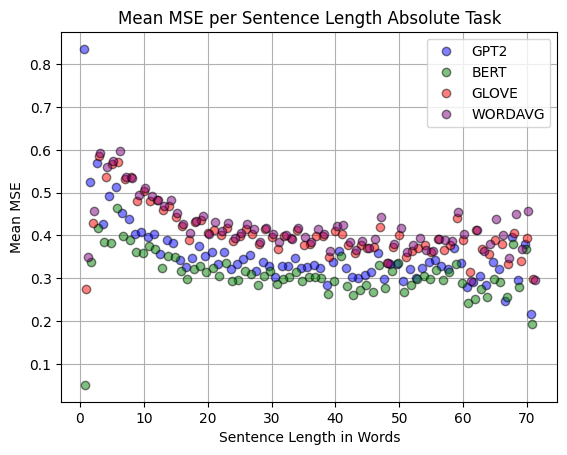

In [204]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [
        gpt2_analyzer,
        bert_analyzer,
        glove_analyzer,
        # dummy_analyzer,
        # avg_analyzer,
        wordavg_analyzer,
    ],
    [
        "GPT2",
        "BERT",
        "GLOVE",
        # "DUMMY",
        # "AVG",
        "WORDAVG",
    ],
    mode="sentence_length",
    error_bars=False,
    plot_title="Mean MSE per Sentence Length Absolute Task",
    min_samples=1,
)

### Plot stats over word position

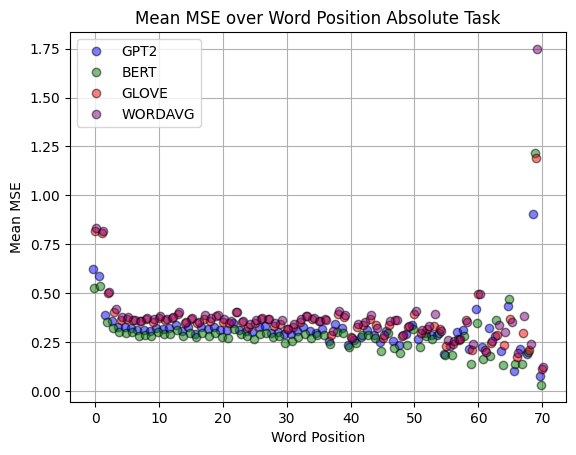

In [206]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [
        gpt2_analyzer,
        bert_analyzer,
        glove_analyzer,
        # dummy_analyzer,
        # avg_analyzer,
        wordavg_analyzer,
    ],
    [
        "GPT2",
        "BERT",
        "GLOVE",
        # "DUMMY",
        # "AVG",
        "WORDAVG",
    ],
    mode="word_position",
    error_bars=False,
    plot_title="Mean MSE over Word Position Absolute Task",
    min_samples=1,
)

### Example visualization

In [201]:
id = 94


examples = [31, 44, 94]

text = gpt2_analyzer.input_texts[id].split(" ")
print(text)
labels = gpt2_analyzer.original_labels[id]
print(f"label length: {len(labels)}")

gpt2_preds = gpt2_analyzer.get_pred(id)[gpt2_analyzer.get_loss_mask(id) == 1]
bert_preds = bert_analyzer.get_pred(id)[bert_analyzer.get_loss_mask(id) == 1]
glove_preds = glove_analyzer.get_pred(id)
# print(glove_preds)
glove_text = glove_analyzer.input_texts[id].split(" ")
print(f"glove text length: {glove_text}")
avg_preds = avg_analyzer.get_pred(id)
wordavg_preds = wordavg_analyzer.get_pred(id)
dummy_preds = dummy_analyzer.get_pred(id)
print(
    f"lengths of preds: {len(gpt2_preds)}, {len(bert_preds)}, {len(glove_preds)}, {len(avg_preds)}, {len(wordavg_preds)}, {len(dummy_preds)}"
)

['He', 'ceased', 'to', 'shake', 'his', 'clasped', 'hands', 'and', 'resting', 'them', 'against', 'his', 'forehead', 'looked', 'right', 'and', 'left', 'of', 'them', 'keenly', 'at', 'his', 'listeners', 'out', 'of', 'his', 'dark', 'stern', 'eyes']
label length: 29
glove text length: ['he', 'ceased', 'to', 'shake', 'his', 'clasped', 'hands', 'and', 'resting', 'them', 'against', 'his', 'forehead', 'looked', 'right', 'and', 'left', 'of', 'them', 'keenly', 'at', 'his', 'listeners', 'out', 'of', 'his', 'dark', 'stern', 'eyes']
lengths of preds: 29, 29, 29, 29, 29, 29


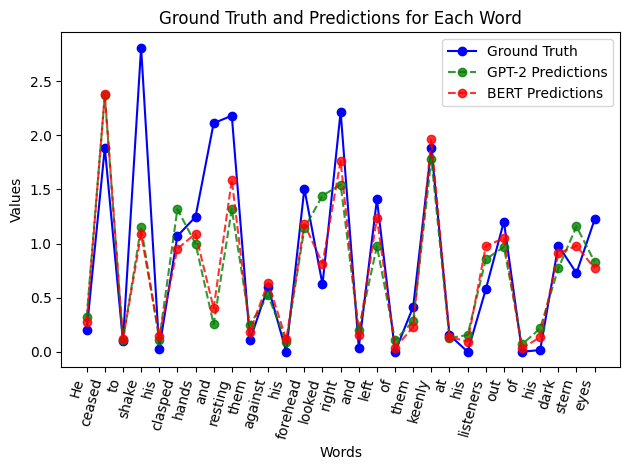

In [202]:
from src.utils.plots import plot_ground_truth_and_predictions

plot_ground_truth_and_predictions(
    text,
    labels,
    [
        gpt2_preds,
        bert_preds,
        # glove_preds,
        # avg_preds,
        # wordavg_preds,
        # dummy_preds,
    ],
    [
        "GPT-2",
        "BERT",
        # "GloVe",
        # "AVG",
        # "WORDAVG",
        # "DUMMY",
    ],
)